**MODEL FOR PREDICTING WEIGHT CATEGORIES**

#Load the dataset

In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
#load dataset
data = pd.read_csv("Obesity.csv")

In [13]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


#data analysis

In [6]:
#analysing dataset
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
categorical_columns = data.select_dtypes(include='object').columns.tolist()
categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [9]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [80]:
unique_values = data['NObeyesdad'].unique()
unique_values

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [11]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


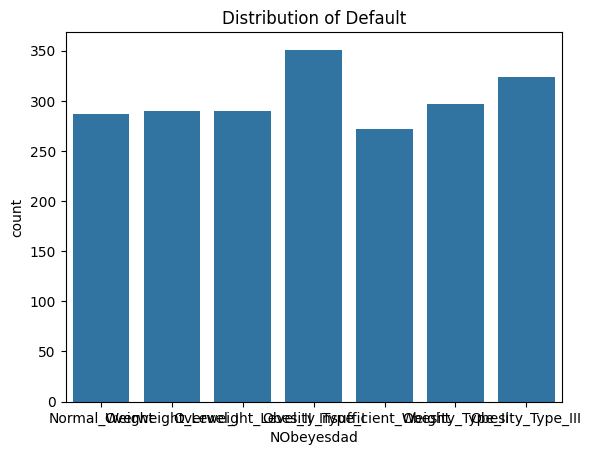

In [22]:
#data visualization
# Countplot of the target variable
sns.countplot(x= 'NObeyesdad', data=data)
plt.title('Distribution of Default')
plt.show()

<ipython-input-61-26deadd00554>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


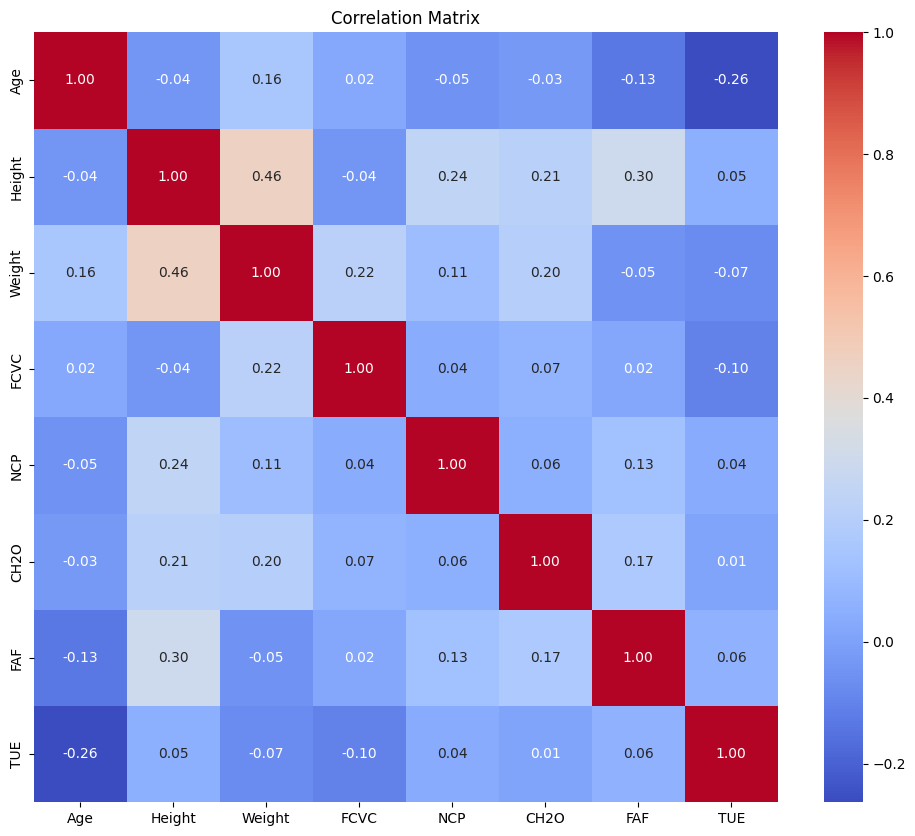

In [61]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#missing value handling

In [10]:
#Check for missing values
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [16]:
#handling missing values
data['Height'] = data[ 'Height'].fillna(data[ 'Height'].mean())

In [60]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


#creating the model
(By using Ramdom Forest Classifier)

In [62]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [51]:
#declaring feature columns and target columns


feature_columns = ['Age', 'Height', 'Weight','FCVC']
target_column =  'NObeyesdad'

In [52]:
X = data[feature_columns]
y = data[target_column]

In [53]:
y.head(30)

0           Normal_Weight
1           Normal_Weight
2           Normal_Weight
3      Overweight_Level_I
4     Overweight_Level_II
5           Normal_Weight
6           Normal_Weight
7           Normal_Weight
8           Normal_Weight
9           Normal_Weight
10         Obesity_Type_I
11    Overweight_Level_II
12          Normal_Weight
13         Obesity_Type_I
14          Normal_Weight
15          Normal_Weight
16    Overweight_Level_II
17         Obesity_Type_I
18    Overweight_Level_II
19     Overweight_Level_I
20    Overweight_Level_II
21         Obesity_Type_I
22          Normal_Weight
23         Obesity_Type_I
24          Normal_Weight
25          Normal_Weight
26          Normal_Weight
27          Normal_Weight
28          Normal_Weight
29          Normal_Weight
Name: NObeyesdad, dtype: object

In [54]:
# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#using random forest classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [56]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#checking the model by sample data inputs

In [57]:
y_pred = model.predict(X_test)

In [58]:
y_pred

array(['Insufficient_Weight', 'Obesity_Type_III', 'Insufficient_Weight',
       'Insufficient_Weight', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I',
       'Insufficient_Weight', 'Obesity_Type_I', 'Obesity_Type_III',
       'Obesity_Type_II', 'Obesity_Type_II', 'Obesity_Type_III',
       'Overweight_Level_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_I', 'Overweight_Level_II', 'Obesity_Type_I',
       'Overweight_Level_I', 'Obesity_Type_III', 'Obesity_Type_I',
       'Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_II',
       'Obesity_Type_III', 'Obesity_Type_III', 'Insufficient_Weight',
       'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II',
       'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III',
       'Obesity_Type_I', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_II',
       'Normal_Weight', 'Normal_Weight', 'Overweight_

In [66]:
data[feature_columns]

,Age,Height,Weight,FCVC
0,21.000000,1.620000,64.000000,2.0
1,21.000000,1.520000,56.000000,3.0
2,23.000000,1.800000,77.000000,2.0
3,27.000000,1.800000,87.000000,3.0
4,22.000000,1.780000,89.800000,2.0
...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0
2107,21.982942,1.748584,133.742943,3.0
2108,22.524036,1.752206,133.689352,3.0
2109,24.361936,1.739450,133.346641,3.0


In [68]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [67]:
model.predict([[21,1.62,64,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Normal_Weight'], dtype=object)

In [69]:
model.predict([[23.66,1.738,133.472,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Obesity_Type_III'], dtype=object)

#checking accuracy of the model

In [70]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9527186761229315


#saving model

In [71]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickled_model = pickle.load(open('model.pkl','rb'))

In [72]:
pickled_model.predict([[23.66,1.738,133.472,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Obesity_Type_III'], dtype=object)

Here I loaded the dataset, then analysed the data clearly.

1.   Checked for missing values and cleared them.
2.   Then choose suitable feature variale and used them to create a model.
3.   Then choose suitable feature variale and used them to create a model.
4.   Model is a **Random Forest model** which can predict the weight category of a person by recieving datas from the user like **Age, Height, Weight, FCVC** .
5.   And give an output about the person whether he has Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Insufficient_Weight,Obesity_Type_II,Obesity_Type_III
6.   Then checked the accuracy of the model.
7.   Then finally saved the model after testing.


